# Imports

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt

from matplotlib.pyplot     import figure
from matplotlib.pyplot     import plot
from IPython.core.display  import HTML
from geopy.geocoders       import Nominatim
from tabulate              import tabulate
from geopy                 import distance
from geopy.distance        import great_circle


## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams['font.size'] = 20
        
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option( 'display.expand_frame_repr', False)        
            
    sns.set()
    sns.set_theme(style = 'darkgrid', font_scale = 2)
    sns.set_style("darkgrid")


In [3]:
jupyter_settings()

## Loading Data

In [4]:
df_raw = pd.read_csv(r'../datasets/raw/kc_house_data.csv')

# Data Description

In [5]:
df1=df_raw.copy()

## Rename Columns

In [6]:
# checking columns names
df1.columns # nothing to rename

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Dimension

In [7]:
print('Number of rows: {}' .format (df1.shape[0]))
print('Number of columns: {}' .format (df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## Data Types

In [8]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [9]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Check NA

In [10]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fill out NA

## Change Variables Types

In [11]:
# changing 'date' type from OBJECT to DATE

# checking DATES types
print(df1[['date','yr_built','yr_renovated']].head(),'\n')
print(df1[['date','yr_built','yr_renovated']].dtypes)

# changing dtypes
df1['date']         = pd.to_datetime(df1['date'],         format='%Y-%m-%d')
# df1['yr_built']     = pd.to_datetime(df1['yr_built'],     format='%Y-%m-%d')
# df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format='%Y-%m-%d')

# checking DATES types
print("")
print(df1[['date','yr_built','yr_renovated']].dtypes)
df1[['date','yr_built','yr_renovated']].head()

              date  yr_built  yr_renovated
0  20141013T000000      1955             0
1  20141209T000000      1951          1991
2  20150225T000000      1933             0
3  20141209T000000      1965             0
4  20150218T000000      1987             0 

date            object
yr_built         int64
yr_renovated     int64
dtype: object

date            datetime64[ns]
yr_built                 int64
yr_renovated             int64
dtype: object


,date,yr_built,yr_renovated
0,2014-10-13,1955,0
1,2014-12-09,1951,1991
2,2015-02-25,1933,0
3,2014-12-09,1965,0
4,2015-02-18,1987,0


## Descriptive Statistics

In [12]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [13]:
num_df1.shape

(21613, 20)

In [14]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,"1,000,102.0","9,900,000,190.0","9,899,000,088.0","4,580,301,520.86","3,904,930,410.0","2,876,499,023.43",0.24,<bound method NDFrame._add_numeric_operations....
1,price,"75,000.0","7,700,000.0","7,625,000.0","540,088.14","450,000.0","367,118.7",4.02,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.0,33.0,33.0,3.37,3.0,0.93,1.97,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.0,8.0,8.0,2.11,2.25,0.77,0.51,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.0,"13,540.0","13,250.0","2,079.9","1,910.0",918.42,1.47,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.0,"1,651,359.0","1,650,839.0","15,106.97","7,618.0","41,419.55",13.06,<bound method NDFrame._add_numeric_operations....
6,floors,1.0,3.5,2.5,1.49,1.5,0.54,0.62,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.0,1.0,1.0,0.01,0.0,0.09,11.39,<bound method NDFrame._add_numeric_operations....
8,view,0.0,4.0,4.0,0.23,0.0,0.77,3.4,<bound method NDFrame._add_numeric_operations....
9,condition,1.0,5.0,4.0,3.41,3.0,0.65,1.03,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [15]:
cat_df1.shape # no attributes

(21613, 0)

# Variable Filtering 

In [16]:
df2=df1.copy()

In [17]:
df2 = df2.drop (['view', 'sqft_living15','sqft_lot15'], axis=1)


# view          	An index from 0 to 4 of how good the view of the property was

# sqft_living15 	The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15    	The square footage of the land lots of the nearest 15 neighbors

In [18]:
# checking properties 'sqft_living' by number of bedrooms

print(df2[['bedrooms','sqft_living']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending=True))
print(df2[['id','bedrooms']].groupby(['bedrooms']).count(),'\n')

df2 = df2[ (df2['bedrooms']!=0) & (df2['bedrooms']!=11) & (df2['bedrooms']!=33) ]

          sqft_living
bedrooms             
1              884.61
2            1,239.75
33           1,620.00
0            1,707.85
3            1,805.84
4            2,554.65
11           3,000.00
5            3,047.55
6            3,284.34
10           3,706.67
9            3,775.00
8            3,800.00
7            3,974.21
            id
bedrooms      
0           13
1          199
2         2760
3         9824
4         6882
5         1601
6          272
7           38
8           13
9            6
10           3
11           1
33           1 



# Feature Engineering

In [19]:
df3 = df2.copy()

## <font color ='red'>Mind Map Hypothesis

## Creating Hypothesis

1. Properties that have water view are 20% more expensive. # usar group bins do DS em Prod. 4.2.2 EDa > Bivariate >
2. Properties with basements have higher grade
3. Properties with basements have bigger 'sqft_living'
4. Properties with basements are 15% more expensive
5. Properties with more than 2 bathrooms are 20% more expensive
8. Properties with more than 2 bedrooms are 25% more expensive
9. Properties with more than 1 floor are 10% more expensive
11. Properties that were not renovated are 40% cheaper
10. Properties that were not renovated in the last 5 years are 15% cheaper
12. Properties that were built in the last 5 years are cheaper than properties that were renovated in the last 5 years
13. Most properties (+50) become available during summer/spring
14. Properties available during summer/spring are 20% more expensive.
14. More than half properties are localized in a xkm radio from the lake.
14. The mean properties price vary according to zipcode > nao tem valor base, não é hipótese.

## <font color ='red'>Features Creation
    get api data

In [20]:
# get data from API in separate dataframe

# # query
# df3['query'] = df3[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)
# df_geodata = df3[['id', 'query']].copy()

# # creating empty columns
# df_geodata['place_id']      = "NA"
# df_geodata['house_number']  = 'NA'
# df_geodata['road']          = 'NA'
# df_geodata['neighbourhood'] = 'NA'
# df_geodata['city']          = 'NA'
# df_geodata['county']        = 'NA'
# df_geodata['state']         = 'NA'
# df_geodata['postcode']      ='NA'


# # auxiliar variable that helps localizing the adresses
# geolocator = Nominatim (user_agent = 'api') 

# # loop for
# for i in range (df_geodata.shape[0]):
    
#     print ('Loop: {} / {}'.format(i, df_geodata.shape[0]))
    
#     # api request
#     response = geolocator.reverse(query) # standard variable for API responses // 'reverse' returns an address by location point
    
#     # populating data
#     if 'place_id'in response.raw:
#         df_geodata.loc[i, 'place_id']      = response.raw['place_id']
#     if 'house_number'in response.raw['address']:
#         df_geodata.loc[i, 'house_number']  = response.raw['address']['house_number']
#     if 'road'in response.raw['address']:
#         df_geodata.loc[i, 'road']          = response.raw['address']['road']
#     if 'neighbourhood'in response.raw['address']:
#         df_geodata.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
#     if 'city'in response.raw['address']:
#         df_geodata.loc[i, 'city']          = response.raw['address']['city']
#     if 'county'in response.raw['address']:
#         df_geodata.loc[i,'county']         = response.raw['address']['county']
#     if 'state'in response.raw['address']:
#         df_geodata.loc[i,'state']          = response.raw['address']['state']
#     if 'postcode'in response.raw['address']:
#         df_geodata.loc[i,'postcode']       = response.raw['address']['postcode']

       
# getting geodata temporarily
df_geodata = pd.read_csv('../datasets/interim/api_geodata.csv')

df3 = pd.merge(df3, df_geodata, how='left', on='id')
df3.head()

# saving df_geodata
# df_geodata = pd.to_csv('../datasets/interim/api_geodata_realstate.csv')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,query,road,house_number,neighbourhood,city,county,state
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0,3,7,1180,0,1955,0,98178,47.51,-122.26,"47.5112,-122.257",61st Avenue South,10012,Rainier Beach,Seattle,King County,Washington
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,"47.721,-122.319",Northeast 127th Street,837,NaN,Seattle,King County,Washington
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0,3,6,770,0,1933,0,98028,47.74,-122.23,"47.7379,-122.233",81st Avenue Northeast,15109,NaN,NaN,King County,Washington
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0,5,7,1050,910,1965,0,98136,47.52,-122.39,"47.5208,-122.393",Fauntleroy Way Southwest,9236,NaN,Seattle,King County,Washington
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0,3,8,1680,0,1987,0,98074,47.62,-122.05,"47.6168,-122.045",221st Avenue Northeast,923,NaN,NaN,King County,Washington


In [21]:
# seasons of the year

def season_from_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

df3['season'] = df3['date'].map(season_from_date)
df3[['date','season']].head()

,date,season
0,2014-10-13,autumn
1,2014-12-09,autumn
2,2015-02-25,winter
3,2014-12-09,autumn
4,2015-02-18,winter


In [22]:
# radius from lake

# lake infos
lake_center = [{'lat':47.640883, 'long':-122.259250}]  
lake_tuple = 47.640883, -122.259250 
#tuple(lake_center[0].values())


# distance from Lake
df3['dist_fromlake'] = df3['query'].apply(lambda x: great_circle(lake_tuple, x).km)

df3[['query','dist_fromlake']].sample(5) 

,query,dist_fromlake
10132,"47.6853,-122.35",8.40
8914,"47.5466,-122.197",11.48
3529,"47.6408,-122.403",10.77
1732,"47.2662,-122.088",43.61
3391,"47.3156,-122.188",36.56


In [23]:
# mean price by zipcode
a = df3[['price','zipcode']].groupby('zipcode').mean().reset_index().rename(columns={'price': 'mean_price_zipcode'})
a.head()

df3 = pd.merge(df3, a, on='zipcode', how='left')
df3[['id', 'price', 'zipcode', 'mean_price_zipcode']].sample(5)

,id,price,zipcode,mean_price_zipcode
7714,3882300090,"475,000.00",98052,"643,500.08"
8718,7284900405,"775,000.00",98177,"674,386.28"
14625,723039189,"519,000.00",98070,"485,773.92"
2500,9430110030,"500,000.00",98052,"643,500.08"
13795,2460700650,"280,000.00",98058,"352,145.26"


In [24]:
# decision: buy x hold

df3['decision'] = df3[['price', 'mean_price_zipcode', 'condition']].apply(lambda x: 0 if (x['price'] > x['mean_price_zipcode']) 
                                                                               else 1 if ((x['price'] <= x['mean_price_zipcode']) & (x['condition']>=3))
                                                                               else 2, axis=1) 
                                                                        
                                                             
df3[['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision']].sample(5)
# id | zipcode | preço do imovel | preço da mediana | condição | status s/n

,id,zipcode,price,mean_price_zipcode,condition,decision
2406,3623029045,98070,"482,000.00","485,773.92",4,1
1779,2787720140,98059,"416,000.00","491,269.06",5,1
13580,8951900065,98028,"315,000.00","463,190.70",3,1
11824,2771602420,98119,"472,000.00","849,448.02",3,1
19376,7907600100,98146,"287,500.00","354,104.22",5,1


In [25]:
# sale price suggestion

df3['sale_price_suggestion'] = df3[['price', 'mean_price_zipcode', 'condition']].apply(lambda x: 0 if (x['price'] > x['mean_price_zipcode']) 
                                                                                            else x['price']*1.3 if ((x['price'] <= x['mean_price_zipcode']) & (x['condition']>=3))
                                                                                            else x['price']*1.1, axis=1) 

df3[df3['condition']==2][['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision', 'sale_price_suggestion']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision,sale_price_suggestion
17395,3279000420,98023,"233,000.00","284,437.93",2,2,"256,300.00"
15400,1823049182,98146,"147,400.00","354,104.22",2,2,"162,140.00"
17839,2425700022,98004,"425,000.00","1,357,759.77",2,2,"467,500.00"
12950,6073300040,98056,"375,000.00","419,436.74",2,2,"412,500.00"
334,1665400045,98166,"186,375.00","459,580.58",2,2,"205,012.50"


In [26]:
# expected profit

df3['expected_profit'] = df3[['price', 'sale_price_suggestion']].apply(lambda x: 0 if x['sale_price_suggestion']==0
                                                                                 else (x['sale_price_suggestion'] - x['price']), axis=1) 

df3[['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision', 'sale_price_suggestion', 'expected_profit']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision,sale_price_suggestion,expected_profit
2129,1721059286,98092,"383,000.00","334,921.06",3,0,0.00,0.00
7901,4324500180,98032,"182,000.00","249,464.96",4,1,"236,600.00","54,600.00"
18279,2556500040,98155,"320,000.00","423,567.53",3,1,"416,000.00","96,000.00"
9888,4058801230,98178,"256,000.00","308,464.60",3,1,"332,800.00","76,800.00"
14474,5318101565,98112,"1,625,000.00","1,094,517.80",3,0,0.00,0.00


# <font color ='red'>EDA

In [174]:
df4=df3.copy()

In [175]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## <font color ='red'>Univariate Analysis

### Response Variable

In [176]:
aux1 = df4[df4['expected_profit']!=0][['id', 'expected_profit']].copy()

bin_groups = list(np.arange(0,635000,5000)) # maximum profit = 630,000.00
aux1['expected_profit_binned'] = pd.cut(aux1['expected_profit'], bins=bin_groups)

aux1.head()

,id,expected_profit,expected_profit_binned
0,7129300520,"66,570.00","(65000, 70000]"
2,5631500400,"54,000.00","(50000, 55000]"
4,1954400510,"153,000.00","(150000, 155000]"
6,1321400060,"77,250.00","(75000, 80000]"
7,2008000270,"87,555.00","(85000, 90000]"


In [177]:
a1 = ( aux1.groupby('expected_profit_binned').agg(id_          = ('id', 'count'),
                                               expected_profit = ('expected_profit', 'sum')) ).reset_index()



a1.head()

,expected_profit_binned,id_,expected_profit
0,"(0, 5000]",0,0.00
1,"(5000, 10000]",6,"51,550.00"
2,"(10000, 15000]",22,"268,985.00"
3,"(15000, 20000]",37,"645,611.50"
4,"(20000, 25000]",37,"836,505.50"


In [178]:
a1.sort_values('id_', ascending=False).head()

,expected_profit_binned,id_,expected_profit
14,"(70000, 75000]",667,"48,634,393.50"
16,"(80000, 85000]",663,"54,658,510.70"
17,"(85000, 90000]",632,"55,536,940.20"
20,"(100000, 105000]",600,"61,775,729.10"
15,"(75000, 80000]",567,"44,047,603.50"


In [179]:
a1.sort_values('expected_profit', ascending=False).head()

,expected_profit_binned,id_,expected_profit
26,"(130000, 135000]",549,"72,927,582.90"
32,"(160000, 165000]",422,"68,825,804.10"
29,"(145000, 150000]",429,"63,515,556.60"
23,"(115000, 120000]",531,"62,670,374.10"
20,"(100000, 105000]",600,"61,775,729.10"


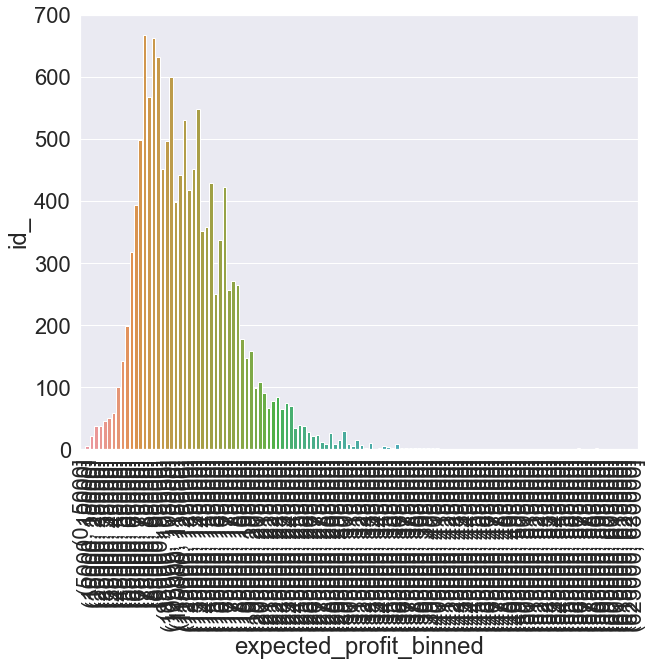

In [180]:
# id_distribution
sns.barplot(data=a1, x='expected_profit_binned', y='id_');
plt.xticks(rotation=90);

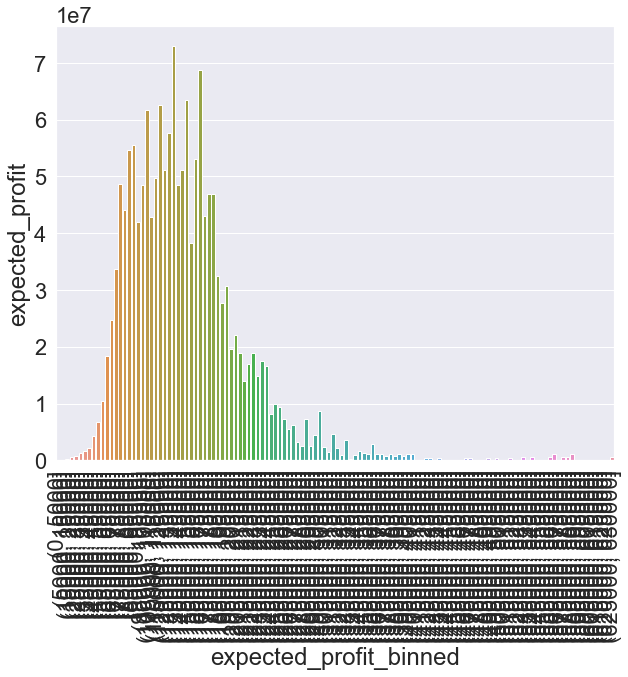

In [181]:
# profit_distribution
sns.barplot(data=a1, x='expected_profit_binned', y='expected_profit');
plt.xticks(rotation=90);

In [182]:
# comparision plot
#comparision, ax1 = plt.subplots()

# ax1.set_xlabel('expected profit binned')
# ax1.set_ylabel('number of properties')
# ax1.plot(a1['expected_profit_binned'], a1['id_'], color='tab:red')
# ax1.tick_params(axis='y')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# ax2.set_ylabel('expected profit')  # we already handled the x-label with ax1
# ax2.plot(a1['expected_profit_binned'], a1['expected_profit'], color='tab:green')
# ax2.tick_params(axis='y')

# comparision.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [183]:
# filtering data for better plot visualization

aux2 = df4[df4['expected_profit']!=0][['id', 'expected_profit']].copy()

bin_groups = list(np.arange(0,305000,5000)) # maximum profit = 630,000.00
aux2['expected_profit_binned'] = pd.cut(aux2['expected_profit'], bins=bin_groups)

aux2.head()

,id,expected_profit,expected_profit_binned
0,7129300520,"66,570.00","(65000, 70000]"
2,5631500400,"54,000.00","(50000, 55000]"
4,1954400510,"153,000.00","(150000, 155000]"
6,1321400060,"77,250.00","(75000, 80000]"
7,2008000270,"87,555.00","(85000, 90000]"


In [184]:
a2 = ( aux2.groupby('expected_profit_binned').agg(id_          = ('id', 'count'),
                                               expected_profit = ('expected_profit', 'sum')) ).reset_index()





a2.head()

,expected_profit_binned,id_,expected_profit
0,"(0, 5000]",0,0.00
1,"(5000, 10000]",6,"51,550.00"
2,"(10000, 15000]",22,"268,985.00"
3,"(15000, 20000]",37,"645,611.50"
4,"(20000, 25000]",37,"836,505.50"


In [185]:
a2.sort_values('id_', ascending=False).head()

,expected_profit_binned,id_,expected_profit
14,"(70000, 75000]",667,"48,634,393.50"
16,"(80000, 85000]",663,"54,658,510.70"
17,"(85000, 90000]",632,"55,536,940.20"
20,"(100000, 105000]",600,"61,775,729.10"
15,"(75000, 80000]",567,"44,047,603.50"


In [186]:
a2.sort_values('expected_profit', ascending=False).head()

,expected_profit_binned,id_,expected_profit
26,"(130000, 135000]",549,"72,927,582.90"
32,"(160000, 165000]",422,"68,825,804.10"
29,"(145000, 150000]",429,"63,515,556.60"
23,"(115000, 120000]",531,"62,670,374.10"
20,"(100000, 105000]",600,"61,775,729.10"


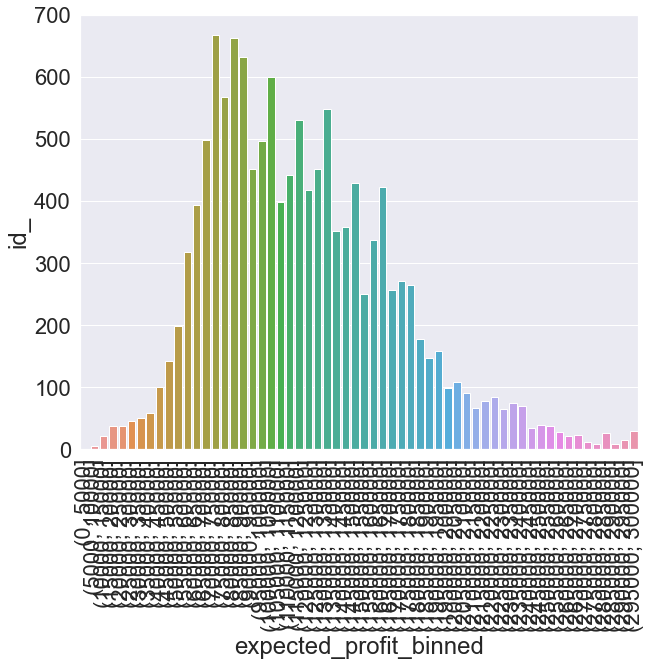

In [187]:
# id_distribution
sns.barplot(data=a2, x='expected_profit_binned', y='id_');
plt.xticks(rotation=90);

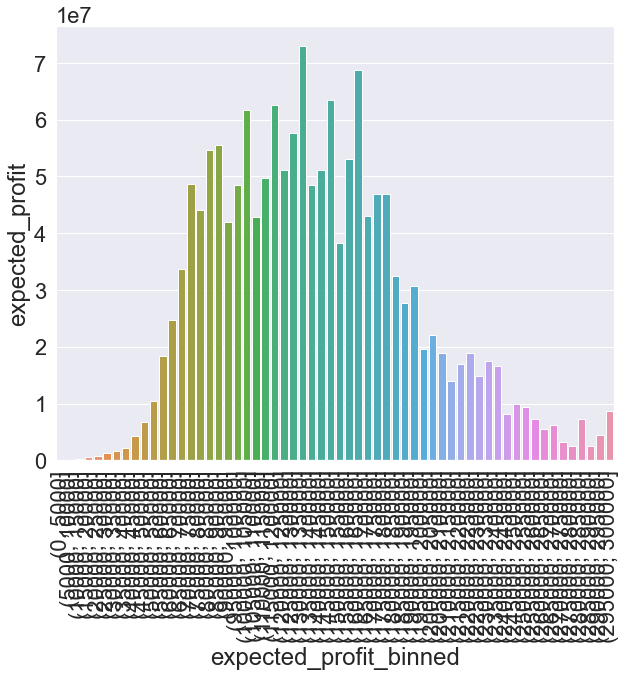

In [188]:
# profit_distribution
sns.barplot(data=a2, x='expected_profit_binned', y='expected_profit');
plt.xticks(rotation=90);

### <font color ='red'> Numerical Variables

In [189]:
num_df4.isna().sum()

id                       0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
zipcode                  0
lat                      0
long                     0
dist_fromlake            0
mean_price_zipcode       0
decision                 0
sale_price_suggestion    0
expected_profit          0
dtype: int64

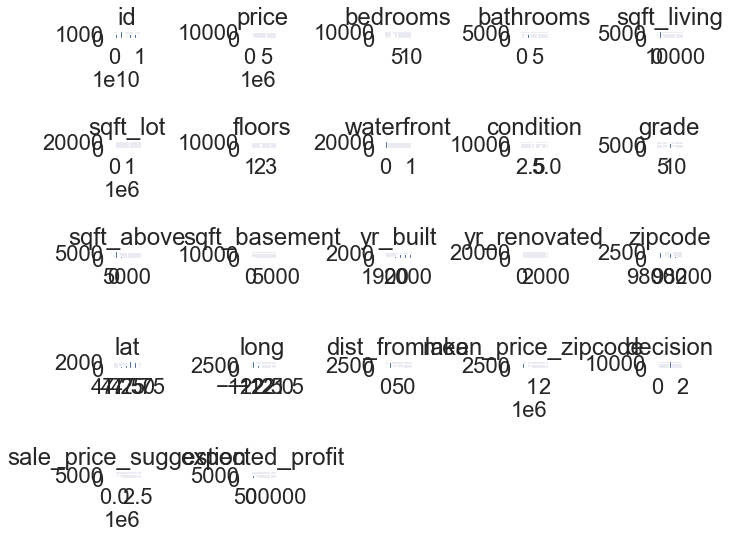

In [190]:
num_df4.hist(bins=20);
plt.tight_layout() 

#### <font color = 'red'> Analisar cada variável para identificar outliers

### <font color ='red'>Categorical Variables

In [191]:
print(cat_df4.dtypes)
cat_df4.head()

query            object
road             object
house_number     object
neighbourhood    object
city             object
county           object
state            object
season           object
dtype: object


,query,road,house_number,neighbourhood,city,county,state,season
0,"47.5112,-122.257",61st Avenue South,10012,Rainier Beach,Seattle,King County,Washington,autumn
1,"47.721,-122.319",Northeast 127th Street,837,NaN,Seattle,King County,Washington,autumn
2,"47.7379,-122.233",81st Avenue Northeast,15109,NaN,NaN,King County,Washington,winter
3,"47.5208,-122.393",Fauntleroy Way Southwest,9236,NaN,Seattle,King County,Washington,autumn
4,"47.6168,-122.045",221st Avenue Northeast,923,NaN,NaN,King County,Washington,winter


In [192]:
cat_df4.isna().sum()

query                0
road               225
house_number      1280
neighbourhood    14629
city             12755
county               0
state                0
season               0
dtype: int64

In [193]:
# profit overview by season
a = ( df4[['id','price','expected_profit','season']].groupby('season')
                                                  .agg(id_   = ('id', 'count'),
                                                       price  = ('price', 'mean'),
                                                       profit = ('expected_profit', 'sum')).reset_index() )
a.sort_values('profit', ascending=False)

,season,id_,price,profit
1,spring,6926,"556,775.41","501,992,488.40"
2,summer,6216,"537,558.93","473,480,397.00"
0,autumn,4998,"526,684.98","377,651,182.10"
3,winter,3814,"520,425.99","272,670,413.70"


#### Fill NAs (do it later)

In [116]:
# filling NAs

# road               225
# house_number      1280
# neighbourhood    14629
# city             12755

In [117]:
address = df4[['id', 'zipcode', 'query', 'road', 'house_number', 'neighbourhood', 'city', 'county']]
address.head()

,id,zipcode,query,road,house_number,neighbourhood,city,county
0,7129300520,98178,"47.5112,-122.257",61st Avenue South,10012,Rainier Beach,Seattle,King County
1,6414100192,98125,"47.721,-122.319",Northeast 127th Street,837,NaN,Seattle,King County
2,5631500400,98028,"47.7379,-122.233",81st Avenue Northeast,15109,NaN,NaN,King County
3,2487200875,98136,"47.5208,-122.393",Fauntleroy Way Southwest,9236,NaN,Seattle,King County
4,1954400510,98074,"47.6168,-122.045",221st Avenue Northeast,923,NaN,NaN,King County


In [120]:
a = address[['zipcode', 'neighbourhood']].groupby('zipcode').count().reset_index()
print(a.shape)
a.head()

(70, 2)


,zipcode,neighbourhood
0,98001,40
1,98002,30
2,98003,87
3,98004,52
4,98005,70


In [126]:
a = address[address['zipcode']==98002][['zipcode', 'neighbourhood']]
a['neighbourhood'].unique()

array([nan, 'Stuck', 'Riverpointe'], dtype=object)

In [118]:
a = address[address['neighbourhood'].isnull()][['zipcode', 'id']].groupby('zipcode').count().reset_index()
print(a.shape)
a.head()

(70, 2)


,zipcode,id
0,98001,327
1,98002,173
2,98003,201
3,98004,269
4,98005,98


In [172]:
a = address[address['city'].isnull()][['zipcode', 'id']].groupby('zipcode').count().reset_index()
print(a.shape)
a.head()

(52, 2)


,zipcode,id
0,98001,367
1,98002,203
2,98003,288
3,98004,82
4,98006,1


In [131]:
a = df4[['id', 'county']].groupby('county').count().reset_index()
a

# avaliar deletar outliers qdo for preencher os NAs

,county,id
0,King County,21937
1,Pierce County,15
2,Snohomish County,2


In [130]:
a = df4[['id', 'city']].groupby('city').count().reset_index()
a

# avaliar deletar outliers qdo for preencher os NAs

,city,id
0,Bellevue,1347
1,Kent,5
2,King County,2
3,Seattle,7193
4,Shoreline,652


## <font color='red'> Bivariate Analysis

In [194]:
print('Hypothesis Resume \n\n')
tab = [ ['Hypothesis', 'Conclusion', 'Relevance'],
        ['H1','False','Low'],
        ['H2','False','Medium'],
        ['H3','False','Medium'],
        ['H4','False','Low'],
        ['H5','False','Low'],
        ['H6','False','Low'],
        ['H7','False','Low'],
        ['H8','False','Low'],
        ['H9','False','High'],
        ['H10','True','High'],
        ['H11','True','High'],
        ['H12','True','High'],
      ]

print(tabulate(tab, headers = 'firstrow'))

Hypothesis Resume 


Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            False         Low
H2            False         Medium
H3            False         Medium
H4            False         Low
H5            False         Low
H6            False         Low
H7            False         Low
H8            False         Low
H9            False         High
H10           True          High
H11           True          High
H12           True          High


1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade
3. Properties with basements have bigger 'sqft_living'
4. Properties with basements are 15% more expensive
5. Properties with more than 2 bathrooms are 20% more expensive
6. Properties with more than 2 bedrooms are 25% more expensive
7. Properties with more than 1 floor are 10% more expensive
8. Properties that were not renovated are 40% cheaper
9. Properties that were not renovated in the last 5 years are 15% cheaper
10. Properties that were built in the last 5 years are cheaper than properties that were renovated in the last 5 years
11. Most properties (+50%) became available during summer/spring
12. Properties available during summer/spring are 20% more expensive.
13. More than half properties are localized in a xkm radio from the lake.
14. Properties selected to be bought that are localized in a xkm radio from the lake results on 20% more profit

### Properties that have water view are 50% more expensive
**False:** Properties that have water view are more than 300% more expensive

In [238]:
a = df4[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
print(a)

hasnot_waterfront = a.iloc[0,1]
has_waterfront = a.iloc[1,1]

percentage = abs( ((has_waterfront - hasnot_waterfront) / hasnot_waterfront)*100 )
print('\nProperties that have water view are', '{:,.2f}'.format(percentage),'% more expensive')

   waterfront        price
0           0   529,763.81
1           1 1,661,876.02

Properties that have water view are 213.70 % more expensive


### Properties with basements have higher grade
**True:** Properties with basements have a <font color ='blue'> slightly <font color='black'> lower grade

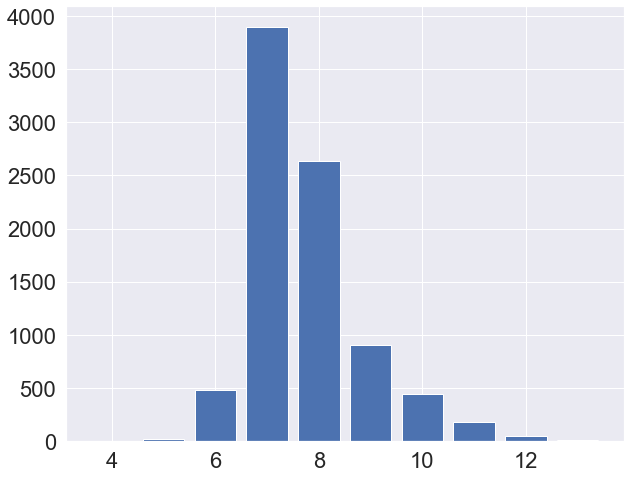

In [197]:
# properties with basement

a = df4[df4['sqft_basement']!=0][['id', 'grade', 'sqft_basement']].copy()
#print(a.head(), '\n')
#print(a.shape)

has_basement = a[['id','grade']].groupby('grade').count().reset_index()
plt.bar(has_basement['grade'], has_basement['id'])
plt.rcParams['figure.figsize'] = (10,8)

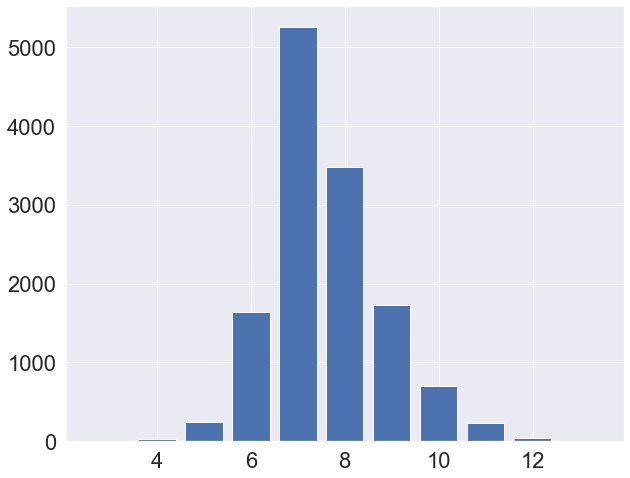

In [198]:
# properties without basement

a = df4[df4['sqft_basement']==0][['id', 'grade', 'sqft_basement']].copy()
#print(a.head(), '\n')
#print(a.shape)

hasnot_basement = a[['id','grade']].groupby('grade').count().reset_index()
plt.bar(hasnot_basement['grade'], hasnot_basement['id'])
plt.rcParams['figure.figsize'] = (10,8)

In [199]:
# weighted average mean
w_avg_has = np.average(np.array(has_basement['grade']), weights=np.array(has_basement['id']))
print('Weighted Average for properties with basement:', w_avg_has)

w_avg_hasnot = np.average(np.array(hasnot_basement['grade']), weights=np.array(hasnot_basement['id']))
print('Weighted Average for properties without basement:', w_avg_hasnot)

print('\nSmall difference, not relevant')

Weighted Average for properties with basement: 7.7276314262504355
Weighted Average for properties without basement: 7.59616105570968

Small difference, not relevant


### Properties with basements have bigger 'sqft_living'
**True:** Properties with basement have bigger sqft_living on average.

In [200]:
has_basement = df4[df4['sqft_basement']!=0][['sqft_living']].mean()
has_basement

sqft_living   2,309.89
dtype: float64

In [201]:
hasnot_basement = df4[df4['sqft_basement']==0][['sqft_living']].mean()
hasnot_basement

sqft_living   1,922.47
dtype: float64

### Properties with basements are 15% more expensive
**False:** Properties with basement are 21.86 % cheaper

In [235]:
has_basement = df4[df4['sqft_basement']==0][['price']].mean()[0]
print('Average price of properties with basement:', has_basement)

hasnot_basement = df4[df4['sqft_basement']!=0][['price']].mean()[0]
print('Average price of properties without basement:', hasnot_basement)

percentage = abs( ((has_basement - hasnot_basement) / hasnot_basement)*100 )
print('Properties with basement are', '{:,.2f}'.format(percentage),'% cheaper')

Average price of properties with basement: 484910.8693859189
Average price of properties without basement: 620600.3026575374
Properties with basement are 21.86 % cheaper


### Properties with 1 to 2 bathrooms are 20% more expensive than properties with up to 1 bathroom
**False:** Properties with 1 to 2 bathrooms are 68.12 % more expensive

In [250]:
a = df4[['id', 'bathrooms', 'price']].copy()
a.head()

b = (a.groupby('bathrooms').agg(id_       = ('id', 'count'),
                                avg_price = ('price', 'mean'))).reset_index()

b1 = b[b['bathrooms']<=1]
b1_mean = b1['avg_price'].mean()
print('Average price of properties with up to 1 bathroom', b1_mean)

b2= b[(b['bathrooms']>1) & (b['bathrooms']<=2)]
b2_mean = b2['avg_price'].mean()
print('Average price of properties with 1 to 2 bathroom', b2_mean)

percentage = abs( ((b2_mean - b1_mean) / b1_mean)*100 )
print('Properties with 1 to 2 bathrooms are', '{:,.2f}'.format(percentage),'% more expensive')

Average price of properties with up to 1 bathroom 288486.107924337
Average price of properties with 1 to 2 bathroom 485004.8813805919
Properties with 1 to 2 bathrooms are 68.12 % more expensive


### Properties with 3 bedrooms are  25% more expensive than those which have 2 bedrooms
**False:** Properties with 3 bedroms are  15.83 % more expensive

In [251]:
a = df4[['id', 'bedrooms', 'price']].copy()
a.head()

b = (a.groupby('bedrooms').agg(id_       = ('id', 'count'),
                               avg_price = ('price', 'mean'))).reset_index()

b2 = b.iloc[1,2]
b3 = b.iloc[2,2]

print('Average price of properties with 2 bedrooms is', b2)
print('Average price of properties with 3 bedrooms is', b3)

percentage = abs( ((b3 - b2) / b2)*100 )
print('Properties with 3 bedroms are ', '{:,.2f}'.format(percentage),'% more expensive')

Average price of properties with 2 bedrooms is 400972.7037037037
Average price of properties with 3 bedrooms is 464446.54804234917
Properties with 3 bedroms are  15.83 % more expensive


### Properties with 2 floors are 15% more expensive than those with 1 floor
**False:** Properties with 2 floors are 30.32 % more expensive

In [253]:
a = df4[['id', 'floors', 'price']].copy()
a.head()

b = (a.groupby('floors').agg(id_       = ('id', 'count'),
                             avg_price = ('price', 'mean'))).reset_index()
b.head()

f1 = b[b['floors']<2]
f1_mean = f1['avg_price'].mean()
print('Average price of properties with up to 1 bathroom', f1_mean)

f2= b[b['floors']==2]
f2_mean = f2['avg_price'].mean()
print('Average price of properties with 1 to 2 bathroom', f2_mean)

percentage = abs( ((f2_mean - f1_mean) / f1_mean)*100 )
print('Properties with 2 floors are', '{:,.2f}'.format(percentage),'% more expensive')

Average price of properties with up to 1 bathroom 497893.1709914863
Average price of properties with 1 to 2 bathroom 648851.0908652687
Properties with 2 floors are 30.32 % more expensive


### Properties that were not renovated are 40% cheaper
lambda error

In [168]:
df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,query,road,house_number,neighbourhood,city,county,state,season,dist_fromlake,mean_price_zipcode,decision,sale_price_suggestion,expected_profit
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0,3,7,1180,0,1955,0,98178,47.51,-122.26,"47.5112,-122.257",61st Avenue South,10012,Rainier Beach,Seattle,King County,Washington,autumn,14.42,"308,464.60",1,"288,470.00","66,570.00"
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,"47.721,-122.319",Northeast 127th Street,837,NaN,Seattle,King County,Washington,autumn,9.97,"467,786.68",0,0.00,0.00
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0,3,6,770,0,1933,0,98028,47.74,-122.23,"47.7379,-122.233",81st Avenue Northeast,15109,NaN,NaN,King County,Washington,winter,10.97,"463,190.70",1,"234,000.00","54,000.00"
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0,5,7,1050,910,1965,0,98136,47.52,-122.39,"47.5208,-122.393",Fauntleroy Way Southwest,9236,NaN,Seattle,King County,Washington,autumn,16.70,"551,688.67",0,0.00,0.00
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0,3,8,1680,0,1987,0,98074,47.62,-122.05,"47.6168,-122.045",221st Avenue Northeast,923,NaN,NaN,King County,Washington,winter,16.28,"680,605.73",1,"663,000.00","153,000.00"


In [317]:
a = df4[['id', 'price', 'yr_renovated']].copy()

a['was_renovated'] = a.apply(lambda x: 0 if x['yr_renovated']==0 else 1 if x['yr_renovated']!=0, axis=1)

a.head()

SyntaxError: invalid syntax (<ipython-input-317-7a68d13eb7d6>, line 3)

### Properties that were not renovated in the last 5 years are 15% cheaper

In [254]:
df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,query,road,house_number,neighbourhood,city,county,state,season,dist_fromlake,mean_price_zipcode,decision,sale_price_suggestion,expected_profit
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0,3,7,1180,0,1955,0,98178,47.51,-122.26,"47.5112,-122.257",61st Avenue South,10012,Rainier Beach,Seattle,King County,Washington,autumn,14.42,"308,464.60",1,"288,470.00","66,570.00"
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,"47.721,-122.319",Northeast 127th Street,837,NaN,Seattle,King County,Washington,autumn,9.97,"467,786.68",0,0.00,0.00
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0,3,6,770,0,1933,0,98028,47.74,-122.23,"47.7379,-122.233",81st Avenue Northeast,15109,NaN,NaN,King County,Washington,winter,10.97,"463,190.70",1,"234,000.00","54,000.00"
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0,5,7,1050,910,1965,0,98136,47.52,-122.39,"47.5208,-122.393",Fauntleroy Way Southwest,9236,NaN,Seattle,King County,Washington,autumn,16.70,"551,688.67",0,0.00,0.00
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0,3,8,1680,0,1987,0,98074,47.62,-122.05,"47.6168,-122.045",221st Avenue Northeast,923,NaN,NaN,King County,Washington,winter,16.28,"680,605.73",1,"663,000.00","153,000.00"


In [255]:
a = df4[['id', 'price', 'yr_renovated']].copy()

In [283]:
a['was_renovated'] = a['was_renovated'].apply(lambda x: 1 if a['yr_renovated']!=0 else 0, axis=1)

KeyError: 'was_renovated'

### Properties that were built in the last 5 years are cheaper than properties that were renovated in the last 5 years

### Most properties (+50%) became available during summer/spring
**True:** Almost 60% of the properties became available during summer/spring

In [313]:
a = df4[['season', 'id']].copy()

a['SS_AW'] = a.apply(lambda x: 'SS' if x['season']=='summer' 
                          else 'SS' if x['season']=='spring' else 'AW', axis=1)


b = a[['SS_AW', 'id']].groupby('SS_AW').count().sort_values('id', ascending=False).reset_index()
b['cumultive_%']=b['id'].cumsum()/b['id'].sum()*100
b.head()

,SS_AW,id,cumultive_%
0,SS,13142,59.86
1,AW,8812,100.00


### Properties available during summer/spring are 20% more expensive.

In [319]:
a = df4[['id', 'season', 'price']].copy()

a['SS_AW'] = a.apply(lambda x: 'SS' if x['season']=='summer' 
                          else 'SS' if x['season']=='spring' else 'AW', axis=1)

a.sample(5)

,id,season,price,SS_AW
1528,3830620710,spring,"206,135.00",SS
2099,2296700260,summer,"460,000.00",SS
1389,9468200140,summer,"450,000.00",SS
11754,5651010320,summer,"335,000.00",SS
9941,2130700860,spring,"375,000.00",SS


In [328]:
b_SS = a[a['season']=='SS']
w_avg_SS = np.average(np.array(b_SS['price']), weights=np.array(b_SS['id']))
print(w_avg_SS)

w_avg_AW = np.average(np.array(a['price']), weights=np.array(a['id']))

ZeroDivisionError: Weights sum to zero, can't be normalized

In [325]:
b = (a.groupby('SS_AW').agg(id_          = ('id', 'count'),
                            price_min    = ('price', 'min'),
                            price_max    = ('price', 'max'),
                            price_median = ('price', 'median'),
                            price_mean   = ('price', 'mean')) ).sort_values('price_mean', ascending=False).reset_index()

SS_mean = b.iloc[0,5]
AW_mean = b.iloc[1,5]

percentage = abs( ((SS_mean - AW_mean) / SS_mean)*100 )
print('Properties with available during Summer/Spring are', '{:,.2f}'.format(percentage),'% more expensive')





b.head()

Properties with available during Summer/Spring are 4.33 % more expensive
547686.2597017196


,SS_AW,id_,price_min,price_max,price_median,price_mean
0,SS,13142,"78,000.00","7,062,500.00","459,995.00","547,686.26"
1,AW,8812,"75,000.00","7,700,000.00","435,000.00","523,975.97"


### Most properties (+50%) are localized in a 15km radio from the lake.
**True:** 50% of the properties are localized in a 15km radio from the lake.

In [200]:
a = df4[['id', 'dist_fromlake']].copy()

bin_groups = list(np.arange(0,75,15)) # maximum dist =~ 71
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)

b = a[['dist_fromlake_binned', 'id']].groupby('dist_fromlake_binned').count().sort_values('id', ascending=False).reset_index()

b['cumultive_%']=b['id'].cumsum()/b['id'].sum()*100

b.head()

,dist_fromlake_binned,id,cumultive_%
0,"(0, 15]",11125,50.71
1,"(15, 30]",6814,81.78
2,"(30, 45]",3746,98.85
3,"(45, 60]",252,100.00


### Most of properties (+50%) that should be bought are in a 15km radius from the lake
**True:** 50% of properties that should be bought are in a 15km radius from the lake

In [202]:
a = df4[df4['decision']!=0][['id', 'dist_fromlake', 'decision']].copy()

bin_groups = list(np.arange(0,75,15)) # maximum dist =~ 71 km
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)
a.head()

b = a[['dist_fromlake_binned', 'decision']].groupby('dist_fromlake_binned').count().sort_values('decision', ascending=False).reset_index()

b['cumultive_%']=b['decision'].cumsum()/b['decision'].sum()*100

b.head()

,dist_fromlake_binned,decision,cumultive_%
0,"(0, 15]",6755,50.71
1,"(15, 30]",4192,82.17
2,"(30, 45]",2221,98.84
3,"(45, 60]",154,100.00


### Properties selected to be bought that are localized in a 15km radio from the lake results on 30% more profit on average
**True:** Properties in a 15km radius from the lake results on 30% more profit on average

In [184]:
a = df4[df4['expected_profit']!=0][['id', 'dist_fromlake', 'expected_profit']].copy()

bin_groups = list(np.arange(0,75,15)) # maximum dist =~ 71
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)
a.head()

b = ( a[['dist_fromlake_binned', 'expected_profit']].groupby('dist_fromlake_binned')
                                                .agg(profit_min    = ('expected_profit', 'min'),
                                                     profit_max    = ('expected_profit', 'max'),
                                                     profit_median = ('expected_profit', 'median'),
                                                     profit_mean   = ('expected_profit', 'mean') ) ).reset_index()
b.head()

,dist_fromlake_binned,profit_min,profit_max,profit_median,profit_mean
0,"(0, 15]","12,500.00","630,000.00","135,900.00","145,678.47"
1,"(15, 30]","7,800.00","240,000.00","99,000.00","108,243.85"
2,"(30, 45]","12,000.00","184,950.00","76,500.00","79,002.83"
3,"(45, 60]","22,500.00","130,500.00","74,092.50","74,771.50"


In [186]:
b['profit_diff_%']=0
b['profit_diff_%'][0] = 0
b['profit_diff_%'][1] = -((b.iloc[0,4] / b.iloc[1,4])-1)*100
b['profit_diff_%'][2] = -((b.iloc[0,4] / b.iloc[2,4])-1)*100
b['profit_diff_%'][3] = -((b.iloc[0,4] / b.iloc[3,4])-1)*100


b.head()

<ipython-input-186-f8ff24738555>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['profit_diff_%'][0] = 0
<ipython-input-186-f8ff24738555>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['profit_diff_%'][1] = -((b.iloc[0,4] / b.iloc[1,4])-1)*100
<ipython-input-186-f8ff24738555>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['profit_diff_%'][2] = -((b.iloc[0,4] / b.iloc[2,4])-1)*100
<ipython-input-186-f8ff24738555>:5: SettingWi

,dist_fromlake_binned,profit_min,profit_max,profit_median,profit_mean,profit_diff_%
0,"(0, 15]","12,500.00","630,000.00","135,900.00","145,678.47",0
1,"(15, 30]","7,800.00","240,000.00","99,000.00","108,243.85",-34
2,"(30, 45]","12,000.00","184,950.00","76,500.00","79,002.83",-84
3,"(45, 60]","22,500.00","130,500.00","74,092.50","74,771.50",-94


#### lixinho

In [ ]:
# df3[df3['sqft_basement']>0]['bathrooms'].unique()

# df3[['sqft_basement','sqft_above','sqft_living','sqft_lot','bedrooms','bathrooms']].sample(10)

In [ ]:
a = df3[['date','season']].groupby('season').count().reset_index()
#a['percentage'] = a.loc['date']/a['date'].shape[0]
a

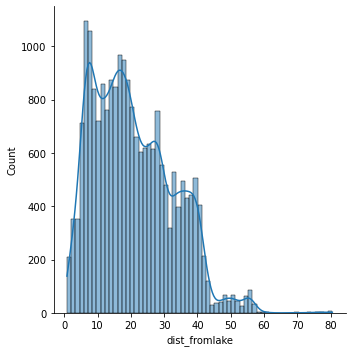

In [200]:
df3[df3['dist_fromlake']>=20][['id','dist_fromlake']].shape[0]
df3[df3['dist_fromlake']<=20][['id','dist_fromlake']].shape[0]
sns.distplot(df3['dist_fromlake'], kde=True)

C:\Users\Mariana\Documents\anaconda3\envs\pythonDS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='dist_fromlake'>

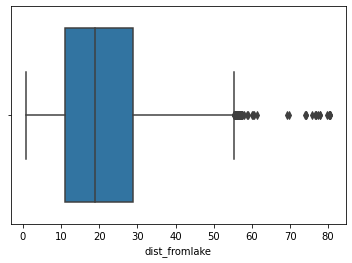

In [201]:
sns.boxplot(df3['dist_fromlake'])

In [ ]:
# 80% property zone
# a = df[['id','neighbourhood']].groupby('neighbourhood').count().sort_values('id',ascending=False).reset_index()
# a ['cum_percentage'] = a['id'].cumsum()/a['id'].sum()*100
# a

# fig, axes = plt.subplots()
# ax1 = a.plot(use_index=True, x='neighbourhood', y='id',  kind='bar', ax=axes)
# ax2 = a.plot(use_index=True, x='neighbourhood', y='cum_percentage', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
# ax2.set_ylim([0,110])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

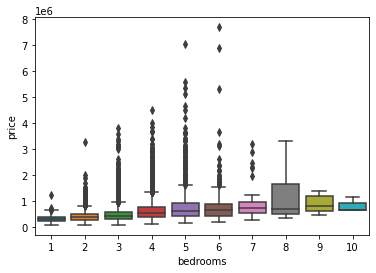

In [64]:
sns.boxplot (x='bedrooms' ,y='price' ,data=df4)

## Multivariate Analysis

### Numerical Attributes

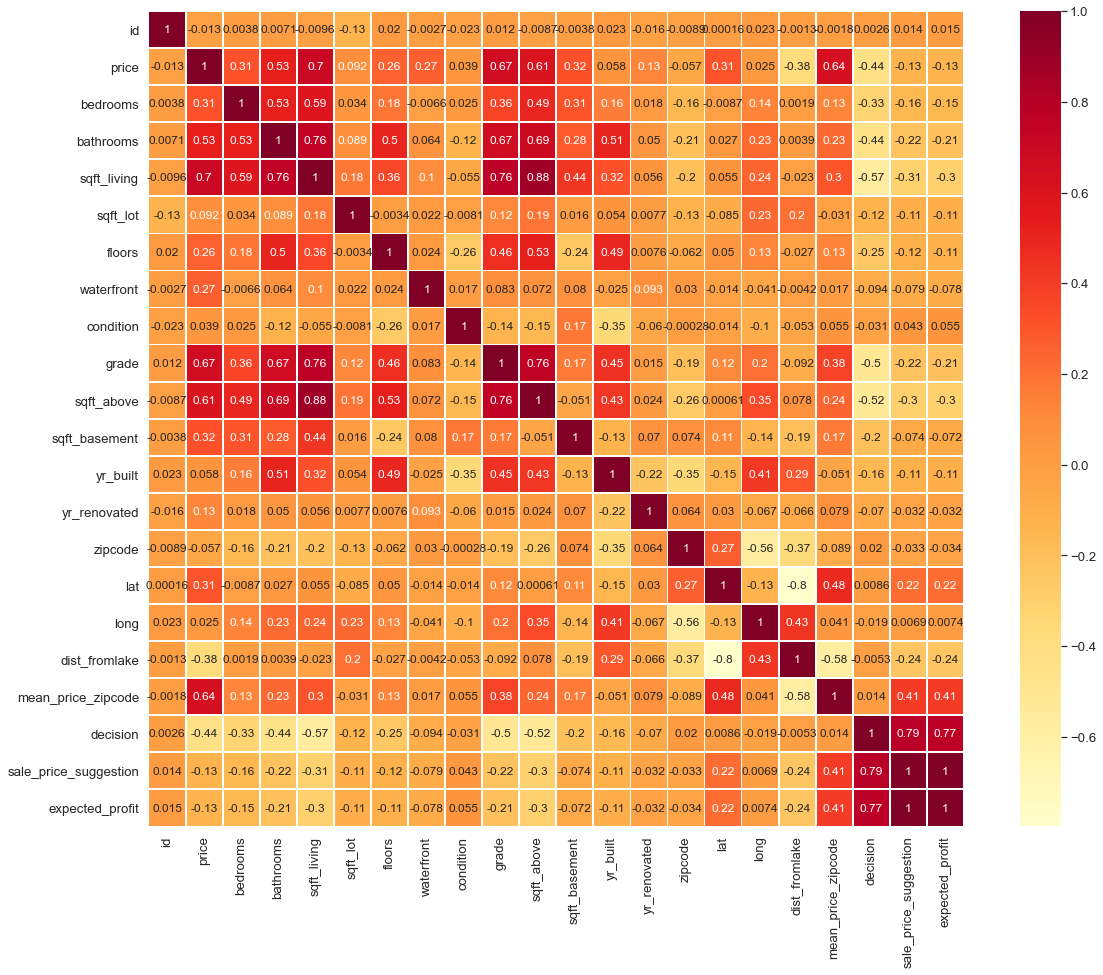

In [132]:
correlation = num_df4.corr(method='pearson')
sns.set(font_scale=1.2)
sns.heatmap(correlation, cmap='YlOrRd', annot=True, 
            annot_kws= {'fontsize':'small'},
            linewidths=0.8, square=True );

### Categorical Attributes

In [135]:
print(cat_df4.shape)
cat_df4.head()

(21954, 8)


,query,road,house_number,neighbourhood,city,county,state,season
0,"47.5112,-122.257",61st Avenue South,10012,Rainier Beach,Seattle,King County,Washington,autumn
1,"47.721,-122.319",Northeast 127th Street,837,NaN,Seattle,King County,Washington,autumn
2,"47.7379,-122.233",81st Avenue Northeast,15109,NaN,NaN,King County,Washington,winter
3,"47.5208,-122.393",Fauntleroy Way Southwest,9236,NaN,Seattle,King County,Washington,autumn
4,"47.6168,-122.045",221st Avenue Northeast,923,NaN,NaN,King County,Washington,winter


# <font color ='red'>Conclusion and Visualization

In [73]:
df5=df4.copy()

In [80]:
df5.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built         datetime64[ns]
yr_renovated     datetime64[ns]
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [ ]:

# ======== Quais os imóveis que a House Rocket deveria comprar e por qual preço?
#          tabela / Relatório com sugestão de compra com valor recomendados
# Agrupar dados por região
# Dentro de cada região, encontrar a mediana do preço de imóveis
# Sugerir que imóveis que estão abaixo do preço mediano de cada região e que estejam em boas condições sejam comprados
# 			Exemplo:
# 			id | zipcode | preço do imovel | preço da mediana | condição | status s/n




# ======== Uma vez comprado, qual o melhor momento para vendê-lo e por qual preço?
#          tabela / Relatório com as sugestões de venda com valor recomendado
# Agrupar dados por região e por sazonalidade (summer, winter)
# Dentro de cada região e sazonalidade, calcular a mediana do preço
# Condição de venda:
# 				- se o preço da compra for maior que a mediana da região + sazonalidade, o preço da venda será igual a compra + 10%,
# - se o preço da compra for menor que a mediana da região + sazonalidade, o preço da venda será igual a compra + 30%
# Exemplo:
# 		id | zipcode | season / pç do imovel | pç da mediana | pç compra / pç venda / lucro




